# Cape

ESTBarreiro - IPS <br>
Bioinformatics - June 2022 <br>
Year 2, Semester 2 

UC: Aprendizagem Automática (Machine Learning)

Made by: <br>
    Duarte Valente <br>

Teacher: <br>
    Jacinto Estima

# 1. Machine Learning Project 

## 1.1. Importing the needed libraries

In [1]:
# General 
import pandas as pd
import matplotlib.pyplot as plt
# Categorical Data
from sklearn import preprocessing
# Model Application
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot

## 1.2. Loading Dataset

In [2]:
df = pd.read_csv (r'in-vehicle-coupon-recommendation.csv')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## 1.3. Checking for Missing Data

In [3]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

### 1.4. Replacing Missing Data

We start by completely removing the car column since it had a lot of missing data and any attempt to replace the missing values would result in a useless feature.

Then we used the backfill method to replace all missing data with the previous value. <br>
We used this method because by looking at the data we tought that filling the values with a previous one wouldn't be relevant enough to give us extremely innacurate results.

In [4]:
df.drop("car", axis=1, inplace=True)
df = df.fillna(method='bfill')
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

### 1.4.1 Checking Dataset Size

In [5]:
df.shape

(12684, 25)

### 1.5. Looking at a Histogram

(array([10069.,     0.,     0.,     0.,     0.,  1210.,     0.,     0.,
            0.,  1405.]),
 array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ]),
 <BarContainer object of 10 artists>)

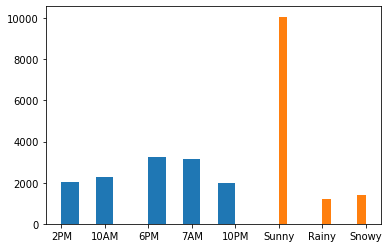

In [6]:
plt.hist(df['time'])
plt.hist(df['weather'])

#### 1.5.1 Looking at Target var histogram

(array([5474.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7210.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

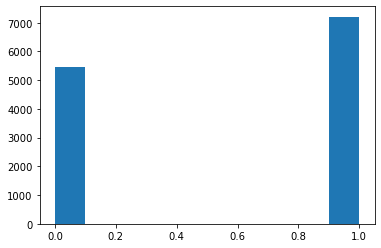

In [7]:
plt.hist(df['Y'])

Note: The 1.5.1 section was added post-presentation and after hearing the teacher's advise that we should have checked if the target variable had a relatively equal distribution, which turned out to be true.

## 1.6. Concluding Dataset Information

Summarizing our annalysis on the dataset. Initially we had 26 characteristics and 12684 samples, after we cleared the data and worked arond the missing values, this numbers changed to 25 characteristics and the same number of samples.<br>
We also noticed that our dataset was arranged categorically and we realized we would need to work around this aswell to apply some of the classification algorithms.

----------------

# 2. Working with categorical data.

## 2.1

There are two types of categorical data, nominal and ordinal. 

The difference between them lies in the fact that ordinals have an order to be maintained while nominals do not.

Before changing the arrangement of the data for being categorical, let's save the dataframe in the rawdf variable

Ordinal Data:

In [8]:
incomeValues = df.income.unique()
monthValues = df.Bar.unique()

In [9]:
incomeDict = {'Less than $12500': 1,'$12500 - $24999': 2,'$25000 - $37499': 3,'$37500 - $49999': 4,"$50000 - $62499":5, "$62500 - $74999":6, "$75000 - $87499":7, "$87500 - $99999":8, "$100000 or More":9}
monthLayoutDict ={'never': 1,'less1': 2,'1~3': 3,'4~8': 4,'gt8': 5}

df.income = df.income.map(incomeDict)
df.Bar = df.Bar.map(monthLayoutDict)
df.CoffeeHouse = df.CoffeeHouse.map(monthLayoutDict)
df.CarryAway = df.CarryAway.map(monthLayoutDict)
df.RestaurantLessThan20 = df.RestaurantLessThan20.map(monthLayoutDict)
df.Restaurant20To50 = df.Restaurant20To50.map(monthLayoutDict)

Nominal Data:

In [10]:
label_encoder = preprocessing.LabelEncoder()

In [11]:
df.destination = label_encoder.fit_transform(df['destination'])
df.passanger = label_encoder.fit_transform(df['passanger'])
df.weather = label_encoder.fit_transform(df['weather'])
df.temperature = label_encoder.fit_transform(df['temperature'])
df.time = label_encoder.fit_transform(df['time'])
df.coupon = label_encoder.fit_transform(df['coupon'])
df.expiration = label_encoder.fit_transform(df['expiration'])
df.gender = label_encoder.fit_transform(df['gender'])
df.age = label_encoder.fit_transform(df['age'])
df.maritalStatus = label_encoder.fit_transform(df['maritalStatus'])
df.education = label_encoder.fit_transform(df['education'])
df.occupation = label_encoder.fit_transform(df['occupation'])

In [12]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,1,2,4,0,0,0,3,...,1,4,4,3,1,0,0,0,1,1
1,1,1,2,2,0,2,1,0,0,3,...,1,4,4,3,1,0,0,0,1,0
2,1,1,2,2,0,1,1,0,0,3,...,1,4,4,3,1,1,0,0,1,1
3,1,1,2,2,2,2,1,0,0,3,...,1,4,4,3,1,1,0,0,1,0
4,1,1,2,2,2,2,0,0,0,3,...,1,4,4,3,1,1,0,0,1,0


------------

# 3. Aplication of Machine Learning Algorithms.

------------

With this dataset we can say in advance that the Naive Bayes algorithm will probably have a better performance then the others since this algorithm stands out mainly with categorical data and for being good at working with many classes.<br>
Which in this case applies.

The other algorithms were chosen because they are used for classification, although we expect that the performance not to be the best, although still usefull.

## 3.1 Naive Bayes

### 3.1.1 - Define Matriz and Target Vector

In [13]:
X = df[['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 
        'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 
        'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 
        'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 
        'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']].values

y = np.array(df['Y'])

### 3.1.2 - Splitting the Dataset as Train and Test Datasets.

We splited as 80% as training Data and 20% as test Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =20)

### 3.1.3 - Checking if is necessary to Normalize or Standardize the Data

Since our data is categorical, there aren't exactly scales to which we have to stick to, so we didn't see any reason why there was a need to normalize or standardize.

### 3.1.4 - Applying Naive Bayes Algorithm

#### 3.1.4.1 - Fitting the model

In [15]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

#### 3.1.4.2 - Testing our algorithm

In [16]:
y_predictNB  =  NB.predict(X_test)

#### 3.1.4.3 - Getting our Results

In [17]:
cmNB = confusion_matrix(y_test, y_predictNB)
acNB = accuracy_score(y_test,y_predictNB)

### 3.1.5 - Checking our results

First checking our model Accuracy and after a confusion matrix.

In [18]:
print("Accuracy Score: {}".format(acNB))

Accuracy Score: 0.6184469846275128


In [19]:
cmNB

array([[ 438,  648],
       [ 320, 1131]], dtype=int64)

------

## 3.2 K-nearest neighbors (KNN)

### 3.2.1 - Define Matriz and Target Vector and applying test-split with 20% of test size


In [20]:
X = df[['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 
        'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 
        'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 
        'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 
        'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']].values

y = np.array(df['Y'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

### 3.2.2 - Checking if is necessary to Normalize or Standardize the Data

Since our data is categorical, there aren't exactly scales to which we have to stick to, so we didn't see any reason why there was a need to normalize or standardize.

### 3.2.3 - Applying K-nearest neighbors (KNN) algorithm

#### 3.2.3.1 - Selecting the number of neighbors

We chose 3 neighbors because with a train/test split with 0 random state, therefore always the same <br>
we checked the accuracy score for k = 3 to 9 and realized that the best value was 3.

This was ideal because with the best accuracy we probably don't have to worie about overfitting the model.

In [22]:
k = 3

#### 3.2.3.2 - Fitting the model

In [23]:
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#### 3.2.3.3 - Predicting results

In [24]:
y_predictKNN = neigh.predict(X_test)

#### 3.2.3.4 - Testing our prediction

In [25]:
acKNN = metrics.accuracy_score(y_test, y_predictKNN)

In [26]:
cmKNN = confusion_matrix(y_test, y_predictKNN)

#### 3.2.3.5 - Checking our results

In [27]:
print(f"k: {k} Accuracy: {acKNN}")
cmKNN

k: 3 Accuracy: 0.637761135199054


array([[ 597,  514],
       [ 405, 1021]], dtype=int64)

## 3.3 Decision Trees (With Random Forest Ensemble)

### 3.2.1 - Define Matriz and Target Vector

In [28]:
X = df[['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 
        'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 
        'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 
        'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 
        'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']].values

y = np.array(df['Y'])

### 3.3.2 - Checking if is necessary to Normalize or Standardize the Data

Since our data is categorical, there aren't exactly scales to which we have to stick to, so we didn't see any reason why there was a need to normalize or standardize.

### 3.2.3 - Applying Random Forest Ensemble algorithm

#### 3.2.3.1 - Test - Splitting our Dataframe

Here we will split our data in two so that we have Training Data that corresponds to 75% of the total data and Test Data that corresponds to the remaining 25%

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, train_size = .75)

#### 3.2.3.2 Actually Applying the Model.

In [30]:
randomForest = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth= 3, criterion= 'entropy')

#### 3.2.3.3 Fitting the Model

In [31]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=1000,
                       random_state=42)

#### 3.2.3.4 Testing our algorithm

In [32]:
y_predictRF  =  randomForest.predict(X_test)

#### 3.2.3.5 Getting our Results

In [33]:
cmRF = confusion_matrix(y_test, y_predictRF)
acRF = accuracy_score(y_test,y_predictRF)

### 3.2.4 - Checking our results

First checking our model Accuracy and after a confusion matrix.

In [34]:
print("Accuracy Score: {}".format(acRF))

Accuracy Score: 0.6385998107852412


In [35]:
cmRF

array([[ 318, 1038],
       [ 108, 1707]], dtype=int64)

### 3.2.5 - Visualising our Results

In [36]:
feature_list = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 
        'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 
        'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 
        'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 
        'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']

#### 3.2.5.1 Choosing one tree from the forest.

In [37]:
tree = randomForest.estimators_[5]

3.2.5.2 Creating a .dot file with the tree information

In [38]:
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

3.2.5.3 Transforming our .dot file to a .png immage

In [39]:
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# 4 Discussion of Results

## 4.1 Naive Bayes Results Discussion


In the Naive Bayes algorithm we were expecting an accuracy of at least 70%, so the 60% obtained was a little disappointing, however we think that the model continues to be useful.


The fact that this algorithm gave a lower precision value than expected may have been due to the fact that there are features with a direct correlation, <br>
such as the time it takes to reach the destination of the coupon.


We also tried to improve the accuracy of the model by removing the columns of the same data with correlation, however this had no effect, even decreasing the accuracy, <br>
so we chose to simply remove this attempt from our code.

After using other algorithms we started to think that maybe the problem was not with the algorithm but with the dataset<br>
which turned out to be comforting since we thought it was well applied and that our prediction and judgment of the algorithm's performance was not that wrong.

## 4.2 KNN Results Discussion

In the KNN algorithm we obtained an accuracy that we consider to be good, <br>
especially after knowing the accuracy of what we initially thought would be the best algorithm to be 60%. <br>
With KNN we achieved an accuracy of 63%, for 3 neighbors.

This algorithm having a better performance than Naive Bayes was a surprise for being more generic.

## 4.3 Decision Tree Results Discussion

In the decision trees method, we chose to use the random forest ensemble to increase the prediction accuracy.<br>
Still, its performance was not the best, with an accuracy of only 61%.

Although the accuracy is above Naive Bayes, we think that this model, out of all of them, had the worst performance in general <br>
and we can justify this because the data are not treated for an adequate analysis of decision trees, even tho our prediction that it would had<br>
around 60% accuracy due to its similarities with KNN where rigth.

Since the data being categorical and having many nominal features , the calculations made by the tree become irrelevant, <br>
drastically reducing its performance and maintaining an extremely high entorpy for most of the model, practically until the state of overfitting, making this approach useless.

We recognize that we failed to run the decision trees properly but we include our results regardless and explain why we think the model did not run well.<br>
Although we were unable to resolve the issue.

# 5. Global Appreciation of the project

In this project, proposed by Professor Jacinto Estima, we were able to understand and put into practice, to the best of our abilities, the knowledge acquired during classes<br>
or by consulting study material on machine learning.

It was possible for us to understand more deeply all the methods we worked with, even if with one of them we were not able to reach a result that we would consider interesting.<br>
After all, we ended up encountering an obstacle that we could not overcome this time, but that we will work to avoid in future machine learning applications.

We also had the opportunity to work with a dataframe with categorical data, <br>
which proved difficult initially and a little desperate to see our colleagues moving forward<br>
while we were stuck in one of the first steps, which made us work even harder to try to catch them and make a good project, we eventually where able to overcome this and understand that concept more deeply.

In the applycation of the algorithms we also got a deeper understanding of how they work to the point that when we were re-reading the project to make our presentation we noticed a error that we think where able to correct properly